## Natural Language Processing With Python

- Regex Basics
- Preprocessing
- Word2Vec

#### Regular Expression Overview

- \ - Matches any decimal digit; this is equivalent to the class [0-9].
- \D - Matches any non-digit character; this is equivalent to the class [^0-9].
- \s - Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
- \S - Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
- \w - Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
- \W - Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_]

**Additional Notes:**

- ^  - Matches at the end of a string
- \.  - Matches a literal dot
- \$  - Matches a literal dollar sign
- \$?  - Matches a dollar sign or nothing (i.e., an optional dollar sign)
- \d  - Matches any single digit (0-9)
- \d*  - Matches runs of zero or more digits
- \d+  - Matches runs of one or more digits


Regular Expressions Source:
https://docs.python.org/3/howto/regex.html


In [29]:
import re

In [27]:
#Replace the Dollar Sign:
val = '$1000'
print(re.sub(r'\D','',val))

#Alternative:
val = '$1000'
print(re.sub(r'^\$','',val))

1000
1000


In [34]:
#Scan Text and find matching words:

str = 'an example word:dog!!'
match = re.search(r'word:\w\w\w', str)
if match:                      
    print('Found:', match.group()) 
else:
    print('No Match')
    
#Second Example:
str = 'piiiig!!'
match = re.search(r'iiig', str)
if match:                      
    print('Found:', match.group()) 
else:
    print('No Match')
    
#Third Example:
str = 'a124g!'
match = re.search(r'\d\d\d', str)
if match:                      
    print('Found:', match.group()) 
else:
    print('No Match')
    
    
#Fourth Example:
str = ['1203a']
x = [re.search(r'\d\d\d',i).group() for i in str]
print('Found: ', x)

Found: word:dog
Found: iiig
Found: 124
Found:  ['120']


In [36]:
#Scan Text and Find Email Address:

#Note:+ -- 1 or more occurrences of the pattern to its left, 
#e.g. 'i+' = one or more i's
l = []
t = 'my email is example1@gmail.com and her email is example2@gmail.com'
words = t.split()
for i in words:
    match = re.search(r'\w+@[\w.]+',i)
    if match:
        l.append(match.group())
print(l)

['example1@gmail.com', 'example2@gmail.com']


### Natural Language Processing with NLTK

**Terminology:**

- tokenizing - word tokenizers and sentence tokenizers 
- lexicon and corporas
- corpora - is a body of text (ex: medical journals, speeches, English language)
- lexicon - is a dictionary: words and their meanings

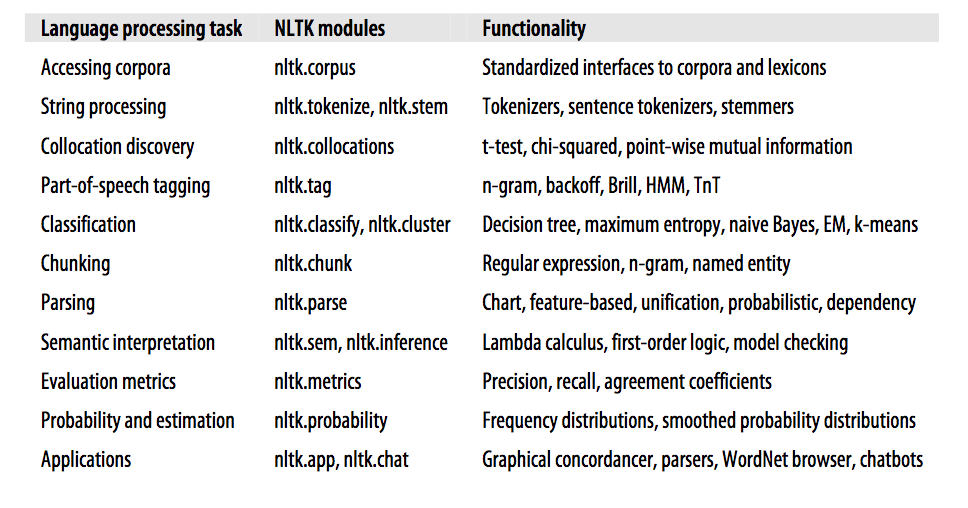

In [1]:
from IPython.display import Image
Image('../sources/nltk.png')

**Terminology:**

- Tokenization: process of converting a text into tokens
- Tokens: words or entities present in the text
- Text object: a sentence or a phrase or a word or an article

In [40]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


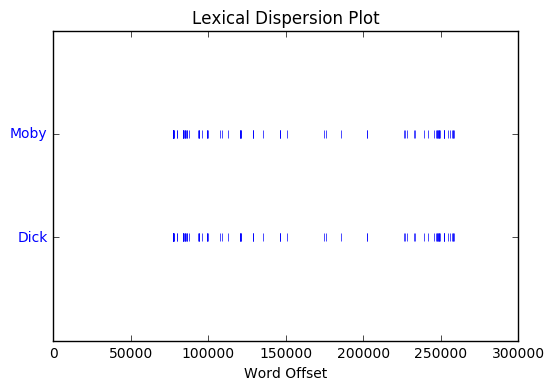

In [51]:
text1.dispersion_plot(['Moby','Dick'])

### Example of Removing Noise 

- Will explore using NLTK for removing stopwords in a few code blocks

In [54]:
def remove_stopwords(text):
    noise = ['is','a','the','of','has']
    words = text.split()
    remove_noise = [w for w in words if w not in noise]
    mod_text = " ".join(remove_noise)
    return(mod_text)

test = 'This sentence has a lot of noise'
remove_stopwords(test)

'This sentence lot noise'

### Lexicon Normalization

- Let's say we have the words “play”, “player”, “played”, “plays” and “playing” -- these words are just different forms of the word – “play”. 
- They do mean different but contextually all are similar.
- Thus to converts all the disparities of a word into their normalized form -- **Lemma**


- **Stemming**:  Stemming is the process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) 
- **Lemmatization**: procedure of obtaining the root form of the word, it makes use of vocabulary dictionary importance of words and the word structure/grammar relations.

In [56]:
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer 

word = "Playing" 
lem = WordNetLemmatizer()
stem = PorterStemmer()

print('Word: %s' % word)
print('Lemmatize: %s' % lem.lemmatize(word, "v"))
print('Stem: %s' % stem.stem(word))

Word: Playing
Lemmatize: Playing
Stem: Play


In [65]:
ps = PorterStemmer()
example_words = ["python","pythoner","pythoning","pythoned","pythonly"]
for w in example_words:
    print(ps.stem(w))

python
python
python
python
pythonli


### Dictionary of Words to Replace

In [58]:
dicts = {'Colorado':'mountains','Florida':'beach'}

def replace_words(text):
    
    words = text.split()
    test = [dicts[w] if w in dicts else w for w in words]
    return(' '.join(test))
        
test = 'My favorite areas to visit is Florida and Colorado'
replace_words(test)

'My favorite areas to visit is beach and mountains'

### Part of speech tagging 

- Every word in a sentence is also associated with a part of speech POS tag such as nouns, verbs, adjectives, adverbs etc.

- Creates tuples with words and the part of speech. Below is a list of the part-of-speech tags 

1. 	Coordinating conjunction
2.	CD	Cardinal number
3.	DT	Determiner
4.	EX	Existential there
5.	FW	Foreign word
6.	IN	Preposition or subordinating conjunction
7.	JJ	Adjective
8.	JJR	Adjective, comparative
9.	JJS	Adjective, superlative
10.	LS	List item marker
11.	MD	Modal
12.	NN	Noun, singular or mass
13.	NNS	Noun, plural
14.	NNP	Proper noun, singular
15.	NNPS	Proper noun, plural
16.	PDT	Predeterminer
17.	POS	Possessive ending
18.	PRP	Personal pronoun
19.	PRP	Possessive pronoun
20.	RB	Adverb
21.	RBR	Adverb, comparative
22.	RBS	Adverb, superlative
23.	RP	Particle
24.	SYM	Symbol
25.	TO	to
26.	UH	Interjection
27.	VB	Verb, base form
28.	VBD	Verb, past tense
29.	VBG	Verb, gerund or present participle
30.	VBN	Verb, past participle
31.	VBP	Verb, non-3rd person singular present
32.	VBZ	Verb, 3rd person singular present
33.	WDT	Wh-determiner
34.	WP	Wh-pronoun
35.	WP	Possessive wh-pronoun
36.	WRB	Wh-adverb


In [60]:
from nltk import word_tokenize, pos_tag
text = 'Today we are learning about Natural Language Processing in Python'
tokens = word_tokenize(text)
pos = pos_tag(tokens)
print(pos)

[('Today', 'NN'), ('we', 'PRP'), ('are', 'VBP'), ('learning', 'VBG'), ('about', 'IN'), ('Natural', 'NNP'), ('Language', 'NNP'), ('Processing', 'NNP'), ('in', 'IN'), ('Python', 'NNP')]


### Named Entity Recognition (NER)

- ORGANIZATION:	Georgia-Pacific Corp., WHO
- PERSON:	Eddy Bonte, President Obama
- LOCATION:	Murray River, Mount Everest
- DATE:	June, 2008-06-29
- TIME:	two fifty a m, 1:30 p.m.
- MONEY:	175 million Canadian Dollars, GBP 10.40
- PERCENT:	twenty pct, 18.75 %
- FACILITY:	Washington Monument, Stonehenge
- GPE:	South East Asia, Midlothian

In [61]:
from nltk import ne_chunk
text = 'Today Trent is learning about Natural Language Processing in Python'
tokens = word_tokenize(text)
pos = pos_tag(tokens)
print(ne_chunk(pos))

(S
  Today/NN
  (PERSON Trent/NNP)
  is/VBZ
  learning/VBG
  about/IN
  (ORGANIZATION Natural/NNP Language/NNP)
  Processing/NNP
  in/IN
  (GPE Python/NNP))


### Cosine Simularity

In [64]:
from collections import Counter
import numpy as np
import math

text1 = 'I enjoy watching LSU football'
text2 = 'I dislike Alabama baseball'

def text_to_vector(text):
    words = text.split()
    return(Counter(words))

def cosine_similarity(vect1,vect2):
    common = set(vect1.keys() & vect2.keys())
    top = sum([vect1[x] * vect2[x] for x in common])
    bottom = np.linalg.norm(list(vect1.values())) * np.linalg.norm(list(vect2.values()))
    if bottom == 0:
        return 0
    else:
        return(math.degrees(math.acos(top/bottom)))

v1,v2 = text_to_vector(text1),text_to_vector(text2)
print('Cosine Simularity: {0:.2f}'.format(cosine_similarity(v1,v2)))

Cosine Simularity: 77.08


In [75]:
w1=wordnet.synset("ship.n.01")
w2 = wordnet.synset("boat.n.01")

print(w1.wup_similarity(w2)*100) #returns a percentage (similar words)

90.9090909090909


### Splitting Up into Sentences and Words

In [2]:
example = "Hello. How are you doing today? I am doing great."
print("Sentences:")
print(sent_tokenize(example))
print("\nSplit into words:")
print(word_tokenize(example))

Sentences:
['Hello.', 'How are you doing today?', 'I am doing great.']

Split into words:
['Hello', '.', 'How', 'are', 'you', 'doing', 'today', '?', 'I', 'am', 'doing', 'great', '.']


In [94]:
from nltk.corpus import state_union
#Unsupervised ML Tokenizer (pre-trained)
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

#training PST on sample_text
custom_sent_tokenizer = PunktSentenceTokenizer(train_text)
tokenized = custom_sent_tokenizer.tokenize(sample_text)

def process_content():
    try:
        for i in tokenized:
            #split by words
            words = nltk.word_tokenize(i)            
            #apply the nltk tagging
            tagged = nltk.pos_tag(words)
            #print(tagged)
        
    except Exception as e:
        print(str(e))
        
process_content()

### Chunking
- Splitting the sentence up by noun phrases

Modifiers:

- {1,3} = for digits, u expect 1-3 counts of digits, or "places"
- plus(+) = match 1 or more
- ? = match 0 or 1 repetitions.
- asterisk(*) = match 0 or MORE repetitions
- $ = matches at the end of string
- ^ = matches start of a string
- | = matches either/or. Example x|y = will match either x or y
- [] = range, or "variance"
- {x} = expect to see this amount of the preceding code.
- {x,y} = expect to see this x-y amounts of the precedng code

In [95]:
def process_content():
    for i in tokenized:
        words = nltk.word_tokenize(i)
        tagged = nltk.pos_tag(words)
        chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
        chunkParser = nltk.RegexpParser(chunkGram)     
        chunked = chunkParser.parse(tagged)
        chunked.draw()

In [96]:
for i in tokenized[5:]:
    words = nltk.word_tokenize(i)
    tagged = nltk.pos_tag(words)
    namedEnt = nltk.ne_chunk(tagged)
    #namedEnt.draw()

### Wordnet

In [97]:
from nltk.corpus import wordnet
syns = wordnet.synsets("program")
print(syns)
print("\n")
print(syns[0])
print(syns[0].lemmas()) #print just the word
print("\n")
print(syns[0].definition()) #print out definition

[Synset('plan.n.01'), Synset('program.n.02'), Synset('broadcast.n.02'), Synset('platform.n.02'), Synset('program.n.05'), Synset('course_of_study.n.01'), Synset('program.n.07'), Synset('program.n.08'), Synset('program.v.01'), Synset('program.v.02')]


Synset('plan.n.01')
[Lemma('plan.n.01.plan'), Lemma('plan.n.01.program'), Lemma('plan.n.01.programme')]


a series of steps to be carried out or goals to be accomplished


In [98]:
#examples
print("\nExample of %s in a sentence.",syns[0])
print(syns[0].examples()) #example in a sentence
print("\n")


Example of %s in a sentence. Synset('plan.n.01')
['they drew up a six-step plan', 'they discussed plans for a new bond issue']




In [99]:
synonyms = []
antonyms = []
for syns in wordnet.synsets("good"):
    for l in syns.lemmas(): #like synonyms
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name)
print(set(synonyms)) 
print(set(antonyms)) 

{'right', 'skillful', 'skilful', 'dear', 'upright', 'expert', 'near', 'commodity', 'adept', 'beneficial', 'effective', 'estimable', 'serious', 'well', 'in_effect', 'full', 'proficient', 'soundly', 'good', 'in_force', 'practiced', 'thoroughly', 'dependable', 'trade_good', 'unspoiled', 'secure', 'sound', 'undecomposed', 'honest', 'goodness', 'respectable', 'just', 'honorable', 'safe', 'unspoilt', 'salutary', 'ripe'}
{<bound method Lemma.name of Lemma('ill.r.01.ill')>, <bound method Lemma.name of Lemma('bad.n.01.badness')>, <bound method Lemma.name of Lemma('evil.n.03.evil')>, <bound method Lemma.name of Lemma('evil.n.03.evilness')>, <bound method Lemma.name of Lemma('bad.n.01.bad')>}


### Stopwords

In [100]:
from nltk.corpus import stopwords
#list of all stop words
print(set(stopwords.words('english')))

{'s', 'should', 've', 't', 'this', 'who', 'after', 'wouldn', 'she', 'her', 'myself', 'against', 'from', 'their', 'aren', 'll', 'what', 'ours', 'being', 'those', 'too', 'more', 'd', 'below', 'yourselves', 'your', 'before', 'these', 'my', 'whom', 'itself', 'is', 'does', 'while', 'just', 'if', 'hers', 'off', 'in', 'and', 'because', 'over', 'ain', 'other', 'wasn', 'between', 'when', 'has', 'very', 'needn', 'weren', 'such', 'the', 'how', 'where', 'had', 'didn', 'a', 'not', 'it', 'above', 'shouldn', 'most', 'few', 'isn', 'couldn', 'themselves', 'was', 'up', 'we', 'o', 'but', 'me', 'why', 'then', 'out', 'during', 'haven', 'mightn', 'so', 'herself', 'there', 'i', 'an', 'to', 'both', 'for', 'only', 'hadn', 'yourself', 'through', 'won', 'do', 'shan', 'been', 'are', 'or', 'about', 'by', 'him', 'am', 'did', 'theirs', 'doing', 'same', 'than', 'any', 'down', 'ma', 'with', 'on', 'at', 'himself', 'under', 'some', 'm', 'its', 'our', 'all', 'y', 'until', 'ourselves', 'no', 'his', 'mustn', 'nor', 'can', 

In [101]:
example = "This is a sample sentence, showing off the stop words works"
stop_words = set(stopwords.words('english'))
word_token = word_tokenize(example)

filter_sentence = [w for w in word_token if not w in stop_words]
print(word_token)
print("\nRemove stop words --> filtered sentence:")
print(filter_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'works']

Remove stop words --> filtered sentence:
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'works']


### Kaggle Movie Review Analysis

In [127]:
import warnings
from bs4 import BeautifulSoup
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings('ignore')

train = pd.read_csv('data/labeledTrainData.tsv',header=0,delimiter='\t',quoting=3)
print(train.columns)

Index(['id', 'sentiment', 'review'], dtype='object')


In [126]:
def preprocess_reviews(raw):
    
    #Get Review Text
    review_text = BeautifulSoup(raw.lower()).get_text()
    
    #Remove punctuation
    review_filt = "".join(w for w in review_text if w not in punctuation)
    
    #Remove stopwords
    words = ' '.join([w for w in review_filt.split() if w not in set(stopwords.words('english'))])
    return(words)


if __name__ == '__main__':
    clean_reviews = []
    for i in range(0,train.shape[0]):
        if i % 1000 == 0:
            print('=== Update: Review {}/{} ==='.format(i,train.shape[0]))
        clean_reviews.append(preprocess_reviews(train['review'][i]))

=== Update: Review 0/25000 ===
=== Update: Review 1000/25000 ===
=== Update: Review 2000/25000 ===
=== Update: Review 3000/25000 ===
=== Update: Review 4000/25000 ===
=== Update: Review 5000/25000 ===
=== Update: Review 6000/25000 ===
=== Update: Review 7000/25000 ===
=== Update: Review 8000/25000 ===
=== Update: Review 9000/25000 ===
=== Update: Review 10000/25000 ===
=== Update: Review 11000/25000 ===
=== Update: Review 12000/25000 ===
=== Update: Review 13000/25000 ===
=== Update: Review 14000/25000 ===
=== Update: Review 15000/25000 ===
=== Update: Review 16000/25000 ===
=== Update: Review 17000/25000 ===
=== Update: Review 18000/25000 ===
=== Update: Review 19000/25000 ===
=== Update: Review 20000/25000 ===
=== Update: Review 21000/25000 ===
=== Update: Review 22000/25000 ===
=== Update: Review 23000/25000 ===
=== Update: Review 24000/25000 ===


**Transform into Document-Train Matrix**

In [131]:
vect = CountVectorizer(analyzer='word',tokenizer=None,stop_words=None,max_features=5000)
train_data_feats = vect.fit(clean_reviews)
cols = train_data_feats.get_feature_names()
dtm = pd.DataFrame(vect.transform(clean_reviews).toarray(),columns=cols)

In [132]:
dtm.head()

,10,100,1010,11,110,12,13,13th,14,15,...,youll,young,younger,youre,youth,youve,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
total = dtm.sum(axis=0).sort_values(ascending=False)[:10]
print('Top Words in Reviews:\n {}'.format(total))

Top Words in Reviews:
 movie     41809
film      37466
one       25156
like      19565
good      14508
even      12328
would     12124
time      11786
really    11639
story     11432
dtype: int64


### Distributed Word Vectors


In this section, we will look at the non-labeled traning set

In [138]:
train = pd.read_csv('data/unlabeledTrainData.tsv',header=0,delimiter='\t',quoting=3)
train.shape

(50000, 2)

Next, we will work with Word2Vec. Published by Google in 2013, Word2Vec is a neural network implementation that learns distributed representations for words. It does not need labels in order to create meaningful representations of the text.

To begin, Word2Vec expects single sentences in which one as a list of words that will be fed into the input of the neural network.

In [180]:
def review_to_sentences(data):
    # Function to split a review into parsed sentences. Returns a 
    
    token_sent = []
    
    for idx, review in enumerate(data['review']):
        
        if idx % 1000 == 0:
            print('=== Update: Review {}/{} ==='.format(idx,train.shape[0]))
        
        raw_sentences = nltk.sent_tokenize(review)
        
        for s in raw_sentences:
            if len(s) > 0: 
                
                #Remove punctuation
                review_filt = "".join(w for w in s if w not in punctuation)
    
                #Remove stopwords
                words = ' '.join([w for w in review_filt.split() if w not in set(stopwords.words('english'))])
                
                #Tokenize text
                tokens = nltk.word_tokenize(words)
                
                #Append to List
                token_sent.append(list(tokens))
                
            else:pass
    
    return(token_sent)

In [181]:
reviews = review_to_sentences(train)

=== Update: Review 0/50000 ===
=== Update: Review 1000/50000 ===
=== Update: Review 2000/50000 ===
=== Update: Review 3000/50000 ===
=== Update: Review 4000/50000 ===
=== Update: Review 5000/50000 ===
=== Update: Review 6000/50000 ===
=== Update: Review 7000/50000 ===
=== Update: Review 8000/50000 ===
=== Update: Review 9000/50000 ===
=== Update: Review 10000/50000 ===
=== Update: Review 11000/50000 ===
=== Update: Review 12000/50000 ===
=== Update: Review 13000/50000 ===
=== Update: Review 14000/50000 ===
=== Update: Review 15000/50000 ===
=== Update: Review 16000/50000 ===
=== Update: Review 17000/50000 ===
=== Update: Review 18000/50000 ===
=== Update: Review 19000/50000 ===
=== Update: Review 20000/50000 ===
=== Update: Review 21000/50000 ===
=== Update: Review 22000/50000 ===
=== Update: Review 23000/50000 ===
=== Update: Review 24000/50000 ===
=== Update: Review 25000/50000 ===
=== Update: Review 26000/50000 ===
=== Update: Review 27000/50000 ===
=== Update: Review 28000/50000 ==

In [184]:
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)

# Set values for various parameters
num_features = 200                       
min_word_count = 40   
num_workers = 4       
context = 7          
downsampling = 1e-3   

print("Training Model...")
model = word2vec.Word2Vec(reviews, workers=num_workers, size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

model.init_sims(replace=True)

model_name = "200features"
model.save(model_name)

2017-08-30 23:15:10,288 : INFO : collecting all words and their counts
2017-08-30 23:15:10,289 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-08-30 23:15:10,324 : INFO : PROGRESS: at sentence #10000, processed 130080 words, keeping 22883 word types
2017-08-30 23:15:10,359 : INFO : PROGRESS: at sentence #20000, processed 256425 words, keeping 34464 word types
2017-08-30 23:15:10,398 : INFO : PROGRESS: at sentence #30000, processed 385489 words, keeping 43472 word types
2017-08-30 23:15:10,437 : INFO : PROGRESS: at sentence #40000, processed 513996 words, keeping 51098 word types
2017-08-30 23:15:10,474 : INFO : PROGRESS: at sentence #50000, processed 640656 words, keeping 57824 word types


Training Model...


2017-08-30 23:15:10,516 : INFO : PROGRESS: at sentence #60000, processed 770592 words, keeping 64237 word types
2017-08-30 23:15:10,554 : INFO : PROGRESS: at sentence #70000, processed 900438 words, keeping 70243 word types
2017-08-30 23:15:10,597 : INFO : PROGRESS: at sentence #80000, processed 1028979 words, keeping 75400 word types
2017-08-30 23:15:10,634 : INFO : PROGRESS: at sentence #90000, processed 1153535 words, keeping 80125 word types
2017-08-30 23:15:10,672 : INFO : PROGRESS: at sentence #100000, processed 1283005 words, keeping 84903 word types
2017-08-30 23:15:10,716 : INFO : PROGRESS: at sentence #110000, processed 1412155 words, keeping 89604 word types
2017-08-30 23:15:10,754 : INFO : PROGRESS: at sentence #120000, processed 1541043 words, keeping 94300 word types
2017-08-30 23:15:10,793 : INFO : PROGRESS: at sentence #130000, processed 1670310 words, keeping 98605 word types
2017-08-30 23:15:10,831 : INFO : PROGRESS: at sentence #140000, processed 1796209 words, keepi

In [185]:
model.most_similar("awful")

[('terrible', 0.8745155334472656),
 ('horrible', 0.8519360423088074),
 ('atrocious', 0.7568026781082153),
 ('dreadful', 0.754968523979187),
 ('horrid', 0.746577262878418),
 ('crappy', 0.7302511930465698),
 ('abysmal', 0.7117416858673096),
 ('horrendous', 0.7106022834777832),
 ('lousy', 0.7018558382987976),
 ('appalling', 0.6974871158599854)]